In [1]:
from ema_workbench import load_results
from SALib.analyze import sobol
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Original seed analysis

In [2]:
# load results of base case
base_case_results = load_results('../data/output/EMA/seedAnalysisBaseCase.tar.gz')
base_case_outcomes = pd.DataFrame(base_case_results[1])

<frozen importlib._bootstrap>:914: ImportWarning: ShimImporter.find_spec() not found; falling back to find_module()


In [3]:
# load results of bad case
bad_case_results = load_results('../data/output/EMA/seedAnalysisBadCase.tar.gz')
bad_case_outcomes = pd.DataFrame(bad_case_results[1])

In [4]:
def plot_convergence_old(outcomes, sample):
    # create plot axis
    fig, axs = plt.subplots(3, 2, figsize=(20,10))

    # make copy of results and create new df for convergence
    o = outcomes.copy()
    con = pd.DataFrame()
    
    # outcomes index pointer
    o_index = 0

    # calculate mean and standard deviation per sample size 
    for s in range(0, sample):
        con.loc[s, 'sampleSize'] = s + 1
        con.loc[s, 'averageMeanSpeed'] = o.loc[o_index:o_index+s, 'meanSpeed'].mean()
        con.loc[s, 'stdMeanSpeed'] = o.loc[o_index:o_index+s, 'meanSpeed'].std()
        con.loc[s, 'averageMeanDensityArea1'] = o.loc[o_index:o_index+s, 'meanDensityArea1'].mean()
        con.loc[s, 'stdMeanDensityArea1'] = o.loc[o_index:o_index+s, 'meanDensityArea1'].std()
        con.loc[s, 'averageMaxDensityArea1'] = o.loc[o_index:o_index+s, 'maxDensityArea1'].mean()
        con.loc[s, 'stdMaxDensityArea1'] = o.loc[o_index:o_index+s, 'maxDensityArea1'].std()
        o_index += (s + 1)

    con = con.astype({'sampleSize': int})
    con.set_index('sampleSize', inplace=True)

    # plot all
    sns.lineplot(
        ax=axs[0][0],
        data=con,
        x=con.index,
        y='averageMeanSpeed'
    )
    axs[0][0].set(xlabel='sample size (iterations)', ylabel='average speed (m/s)')
    sns.lineplot(
        ax=axs[0][1],
        data=con,
        x=con.index,
        y='stdMeanSpeed'
    )
    axs[0][1].set(xlabel='sample size (iterations)', ylabel='std speed (m/s)')
    sns.lineplot(
        ax=axs[1][0],
        data=con,
        x=con.index,
        y='averageMeanDensityArea1'
    )
    axs[1][0].set(xlabel='sample size (iterations)', ylabel='average density (#/m²)')
    sns.lineplot(
        ax=axs[1][1],
        data=con,
        x=con.index,
        y='stdMeanDensityArea1'
    )
    axs[1][1].set(xlabel='sample size (iterations)', ylabel='std average density (#/m²)')
    sns.lineplot(
        ax=axs[2][0],
        data=con,
        x=con.index,
        y='averageMaxDensityArea1'
    )
    axs[2][0].set(xlabel='sample size (iterations)', ylabel='max density (#/m²)')
    sns.lineplot(
        ax=axs[2][1],
        data=con,
        x=con.index,
        y='stdMaxDensityArea1'
    )
    axs[2][1].set(xlabel='sample size (iterations)', ylabel='std max density (#/m²)')

In [5]:
def plot_convergence(outcomes, sample):
    # create plot axis
    fig, axs = plt.subplots(3, 2, figsize=(20,10))

    # make copy of results
    con = outcomes.copy().head(sample)

    # calculate mean per sample size for all outcomes
    for index, row in con.iterrows():
        con.loc[index, 'averageMeanSpeed'] = con.loc[:index, 'meanSpeed'].mean()
        con.loc[index, 'stdMeanSpeed'] = con.loc[:index, 'meanSpeed'].std()
        con.loc[index, 'averageMeanDensityArea1'] = con.loc[:index, 'meanDensityArea1'].mean()
        con.loc[index, 'stdMeanDensityArea1'] = con.loc[:index, 'meanDensityArea1'].std()
        con.loc[index, 'averageMaxDensityArea1'] = con.loc[:index, 'maxDensityArea1'].mean()
        con.loc[index, 'stdMaxDensityArea1'] = con.loc[:index, 'maxDensityArea1'].std()

    con.reset_index(inplace=True)

    # plot all
    sns.lineplot(
        ax=axs[0][0],
        data=con,
        x=con.index,
        y='averageMeanSpeed'
    )
    axs[0][0].set(xlabel='sample size (iterations)', ylabel='average speed (m/s)')
    sns.lineplot(
        ax=axs[0][1],
        data=con,
        x=con.index,
        y='stdMeanSpeed'
    )
    axs[0][1].set(xlabel='sample size (iterations)', ylabel='std speed (m/s)')
    sns.lineplot(
        ax=axs[1][0],
        data=con,
        x=con.index,
        y='averageMeanDensityArea1'
    )
    axs[1][0].set(xlabel='sample size (iterations)', ylabel='average density (#/m²)')
    sns.lineplot(
        ax=axs[1][1],
        data=con,
        x=con.index,
        y='stdMeanDensityArea1'
    )
    axs[1][1].set(xlabel='sample size (iterations)', ylabel='std average density (#/m²)')
    sns.lineplot(
        ax=axs[2][0],
        data=con,
        x=con.index,
        y='averageMaxDensityArea1'
    )
    axs[2][0].set(xlabel='sample size (iterations)', ylabel='max density (#/m²)')
    sns.lineplot(
        ax=axs[2][1],
        data=con,
        x=con.index,
        y='stdMaxDensityArea1'
    )
    axs[2][1].set(xlabel='sample size (iterations)', ylabel='std max density (#/m²)')

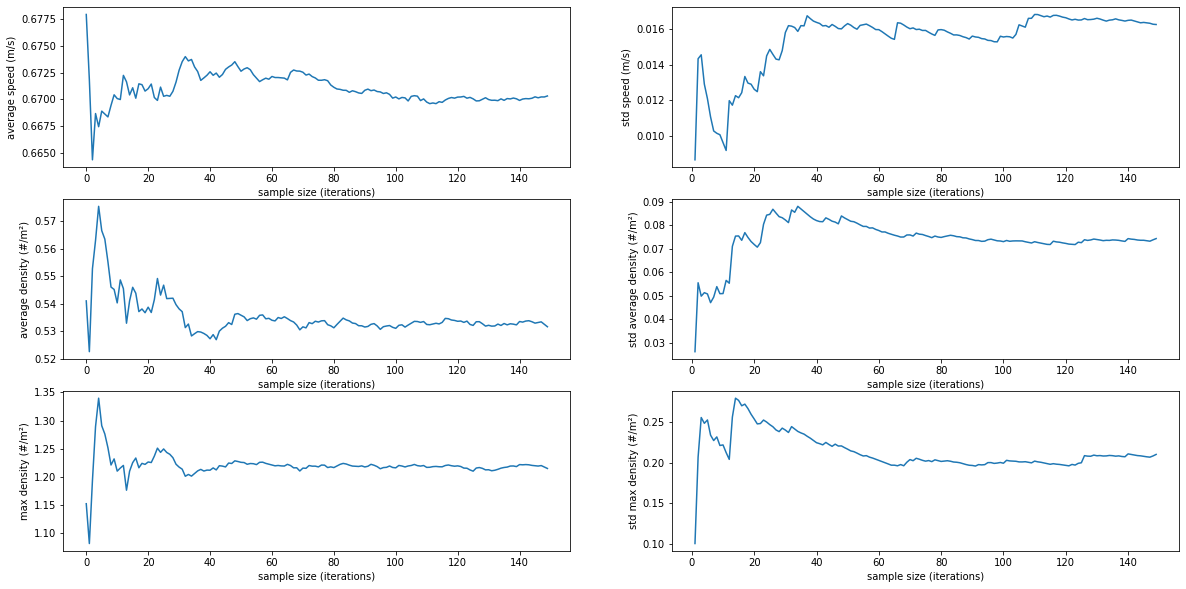

In [6]:
plot_convergence(base_case_outcomes, 150)

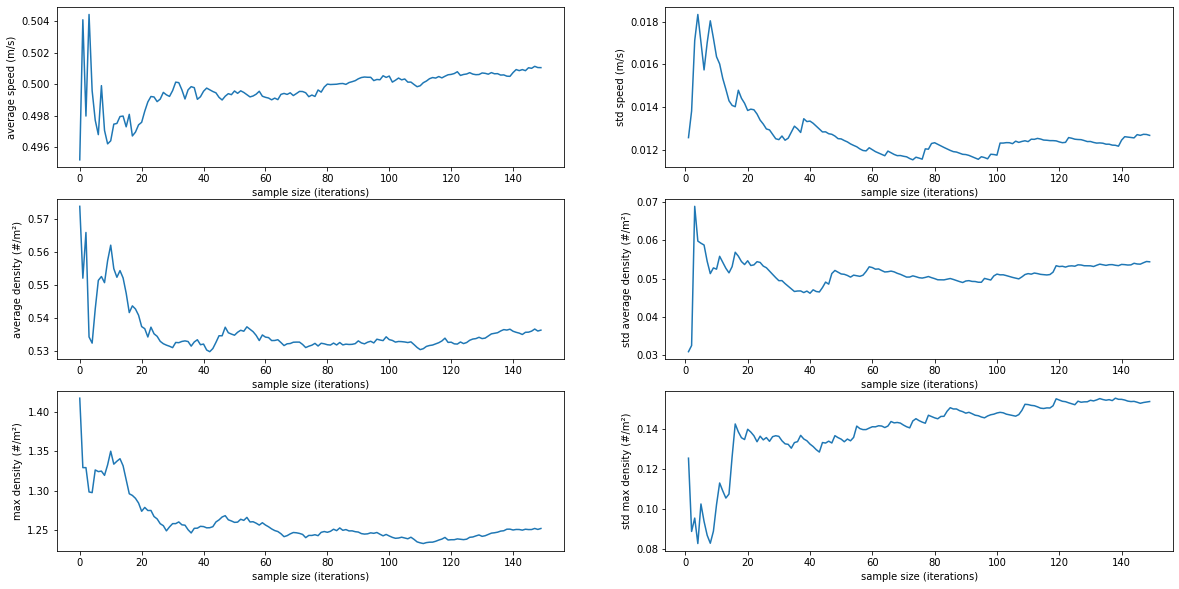

In [7]:
plot_convergence(bad_case_outcomes, 150)

# Additional seed analysis
Check 4 runs with 60 replications for both cases

In [12]:
# load results of base case
add_base_case_results = load_results('../data/output/EMA/seedAnalysisAdditionalBaseCase.tar.gz')
add_base_case_outcomes = pd.DataFrame(add_base_case_results[1])

In [13]:
# load results of bad case
add_bad_case_results = load_results('../data/output/EMA/seedAnalysisAdditionalBadCase.tar.gz')
add_bad_case_outcomes = pd.DataFrame(add_bad_case_results[1])

In [14]:
add_base_case_outcomes

,AverageMeanSpeed,StdMeanSpeed,AverageMeanDensityArea1,stdMeanDensityArea1,MeanMaxDensityArea1,stdMaxDensityArea1
0,0.675812,0.015610,0.536615,0.075919,1.244129,0.209067
1,0.669745,0.015538,0.533333,0.071194,1.221976,0.199447
2,0.674237,0.015695,0.543006,0.071485,1.241176,0.193547
3,0.676158,0.015401,0.527999,0.059957,1.214887,0.190506


In [15]:
add_bad_case_outcomes

,AverageMeanSpeed,StdMeanSpeed,AverageMeanDensityArea1,stdMeanDensityArea1,MeanMaxDensityArea1,stdMaxDensityArea1
0,0.498787,0.012002,0.545970,0.052879,1.261261,0.149620
1,0.499785,0.013415,0.543539,0.050624,1.263034,0.138829
2,0.501728,0.012935,0.540245,0.051688,1.267464,0.155195
3,0.500472,0.011388,0.539436,0.048241,1.258307,0.128168
